# Pandas и Matplotlib
## Пример обработки данных 

Используем для примера данные о фиксации появления НЛО в США.

In [1]:
import pandas as pd

In [2]:
ufo = pd.read_csv('http://bit.ly/uforeports')

Как выглядят данные?

In [3]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


Размерность данных

In [4]:
ufo.shape

(18241, 5)

Преобразуем поле Time к типу datetime

In [5]:
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [6]:
ufo['Time'] = pd.to_datetime(ufo.Time)

In [7]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

Добавим поле Year

In [8]:
ufo['Year'] = ufo.Time.dt.year

In [9]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


Выберем только данные с 1999 года

In [10]:
ufo.loc[ufo.Year >= 1999,:].head()

,City,Colors Reported,Shape Reported,State,Time,Year
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00,1999
12833,Bauxite,NaN,NaN,AR,1999-01-01 03:00:00,1999
12834,Florence,NaN,CYLINDER,SC,1999-01-01 14:00:00,1999
12835,Lake Henshaw,NaN,CIGAR,CA,1999-01-01 15:00:00,1999
12836,Wilmington Island,NaN,LIGHT,GA,1999-01-01 17:15:00,1999


### Частота появления НЛО

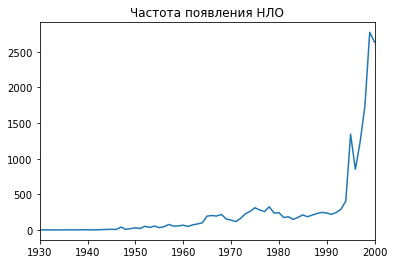

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
ufo.Year.value_counts().sort_index().plot(title='Частота появления НЛО')

In [35]:
ufo.Year.value_counts().sort_values(ascending=False).head()

1999    2774
2000    2635
1998    1743
1995    1344
1997    1237
Name: Year, dtype: int64

Проверим и исправим корректность значений штатов (Ca -> CA, Fl -> FL):

In [36]:
ufo.State.unique()

array(['NY', 'NJ', 'CO', 'KS', 'ND', 'CA', 'MI', 'AK', 'OR', 'AL', 'SC',
       'IA', 'GA', 'TN', 'NE', 'LA', 'KY', 'WV', 'NM', 'UT', 'RI', 'FL',
       'VA', 'NC', 'TX', 'WA', 'ME', 'IL', 'AZ', 'OH', 'PA', 'MN', 'WI',
       'MD', 'SD', 'NV', 'ID', 'MO', 'OK', 'IN', 'CT', 'MS', 'AR', 'WY',
       'MA', 'MT', 'DE', 'NH', 'VT', 'HI'], dtype=object)

In [37]:
ufo.replace(to_replace='Ca', value='CA',inplace=True)
ufo.replace(to_replace='Fl', value='FL',inplace=True)
ufo.State.unique()

array(['NY', 'NJ', 'CO', 'KS', 'ND', 'CA', 'MI', 'AK', 'OR', 'AL', 'SC',
       'IA', 'GA', 'TN', 'NE', 'LA', 'KY', 'WV', 'NM', 'UT', 'RI', 'FL',
       'VA', 'NC', 'TX', 'WA', 'ME', 'IL', 'AZ', 'OH', 'PA', 'MN', 'WI',
       'MD', 'SD', 'NV', 'ID', 'MO', 'OK', 'IN', 'CT', 'MS', 'AR', 'WY',
       'MA', 'MT', 'DE', 'NH', 'VT', 'HI'], dtype=object)

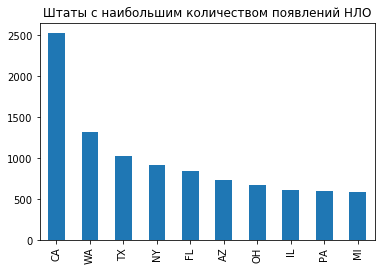

In [46]:
ufo.State.value_counts().sort_values(ascending=False).head(10).plot(kind='bar', title='Штаты с наибольшим количеством появлений НЛО');

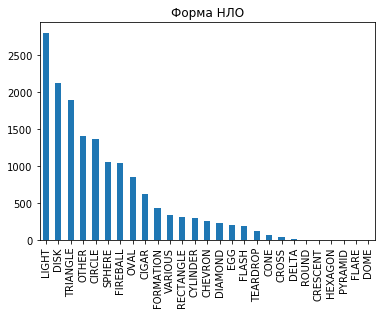

In [50]:
ufo['Shape Reported'].value_counts().sort_values(ascending=False).plot(kind='bar', title='Форма НЛО');